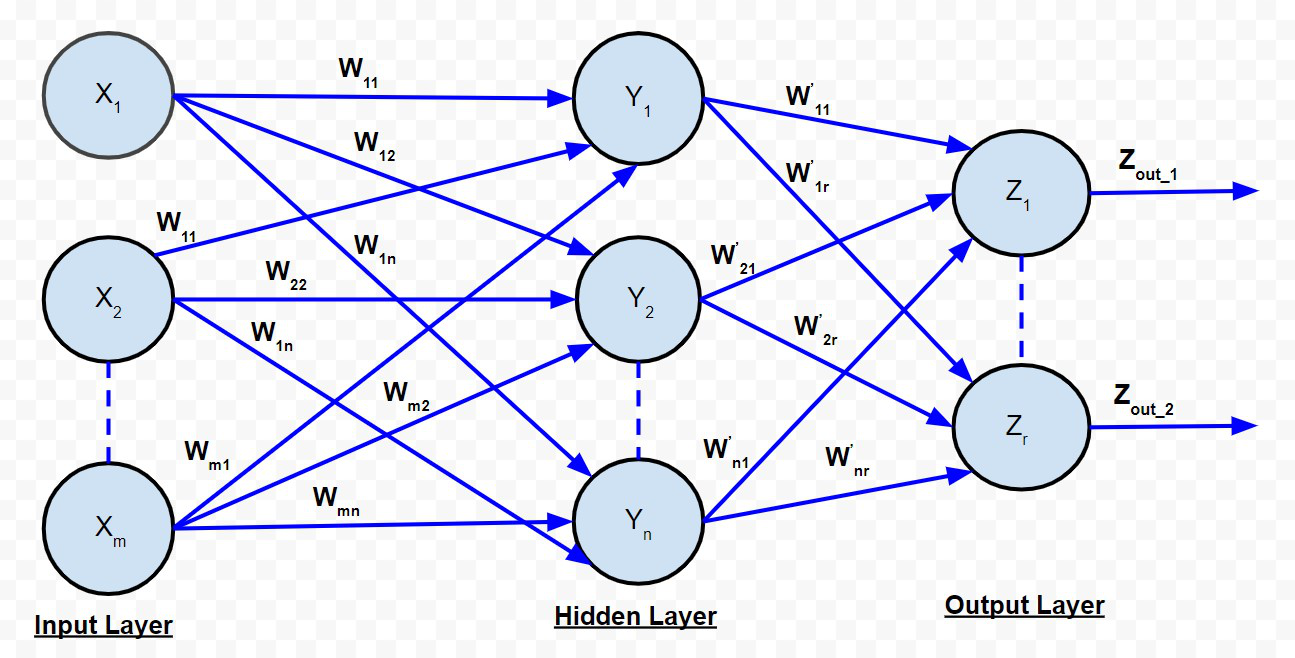

In [1]:
a = 10
b = 5
def lineer_regresyon(x):
  y = a * x + b
  return y


lineer_regresyon(5)

55

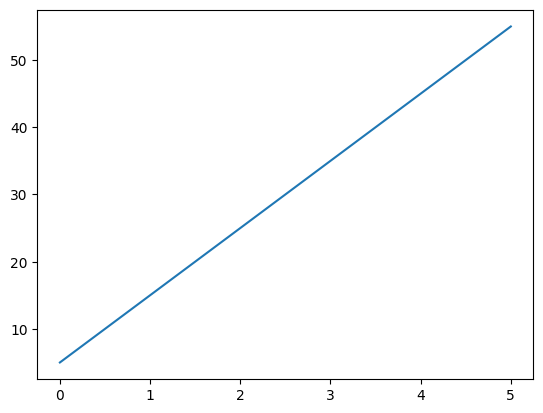

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, 100)
y = lineer_regresyon(x)

plt.plot(x, y)
plt.show()

In [21]:
w1 = 0.7
w2 = 0.3
w3 = 0.4
w4 = 0.6

w5 = 0.55
w6 = 0.46

i1 = 0.5
i2 = 0.3

def sigmoid(x):
  return 1 / (1 + np.exp(-x)) # 2.71828

def z1(i1, i2):
  return i1 * w1 + i2 * w3

def z2(i1, i2):
  return i1 * w2 + i2 * w4

def z3(h1, h2):
  return h1 * w5 + h2 * w6

In [30]:
import plotly.graph_objects as go

x = []
y = []
z = []

for i in range(100):
  for j in range(100):
    x.append((i-50) / 100)
    y.append((j-50) / 100)
    z.append(sigmoid(z1(i-50, j-50)))

# draw the surface
fig = go.Figure(
  data=[go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=7,
            color=z,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
      )]
    )

fig.update_layout(scene = dict(
                    xaxis_title='i1',
                    yaxis_title='i2',
                    zaxis_title='z1'),
                    width=700,
                    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

In [22]:
h1 = sigmoid(z1(i1, i2))
h2 = sigmoid(z2(i1, i2))

o1 = sigmoid(z3(h1, h2))
o1

0.6470438822170728

In [26]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, input_shape=(2,), activation='sigmoid'), # input layer
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid') # output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:

model.predict(tf.constant([[i1, i2]]))

2024-12-07 20:56:00.239781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


array([[0.5490811]], dtype=float32)

In [ ]:
def relu(x):
  if x > 0:
    return x
  
  return 0

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 784 pixel input layer
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)